In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from collections import Counter
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

### 数据读取，所用数据集为“Wine Reviews”

In [2]:
data_1 = pd.read_csv("./dataset/WineReviews/winemag-data-130k-v2.csv", index_col=0)
data_2 = pd.read_csv("./dataset/WineReviews/winemag-data_first150k.csv", index_col=0)
data = pd.concat([data_1, data_2], axis=0)
data.shape

(280901, 13)

### Data review
- We can find that 'country','designation','province','region_1','region_2','taster_name','taster_twitter_handle','variety' and 'winery' are nominal attibutes. There are no sequence relation between attibutes.

- 'points' and 'price' belong to numeric attribute.

In [3]:
data.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
data.isnull().sum()

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
taster_name              177174
taster_twitter_handle    182143
title                    150930
variety                       1
winery                        0
dtype: int64

### 处理空值

In [5]:
def nullplot(data):
    '''
    data: a dataframe on which we want to perform null plot
    '''
    df_null = data.isna()
    nulls_percent_per_col = df_null.sum(axis=0) / len(data)
    
    plt.figure(dpi=600)
    fig, (ax_1, ax_2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 10))
    
    pla = matplotlib.cm.get_cmap("plasma")
    colormap = matplotlib.colors.ListedColormap([pla(0), 'gold'])
    sns.heatmap(data.isnull(), cmap=colormap, ax=ax_1, cbar=False, yticklabels=False)
    nulls_percent_per_col.plot(kind="bar", color="gold", x=nulls_percent_per_col, y=nulls_percent_per_col.index, 
                               ax=ax_2, label="Null value percent")
    ax_2.set_ylim((0,1))
    plt.show()

#### 下图展示了每个特征中的空值情况（空值以黄色标注）

<Figure size 3600x2400 with 0 Axes>

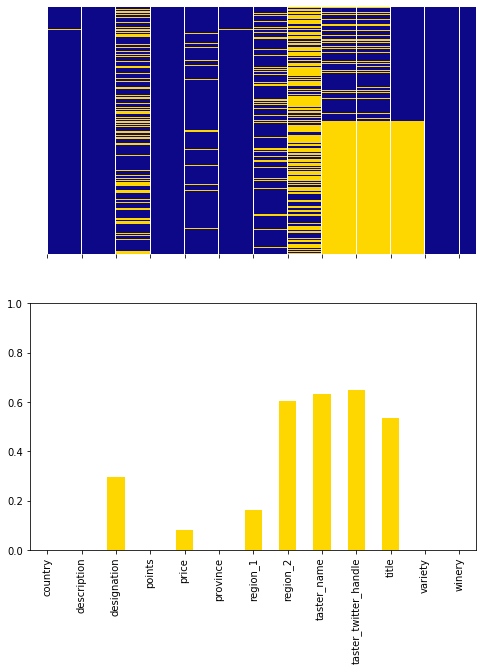

In [6]:
nullplot(data)

#### 直接将含有空值的样本删除

<Figure size 3600x2400 with 0 Axes>

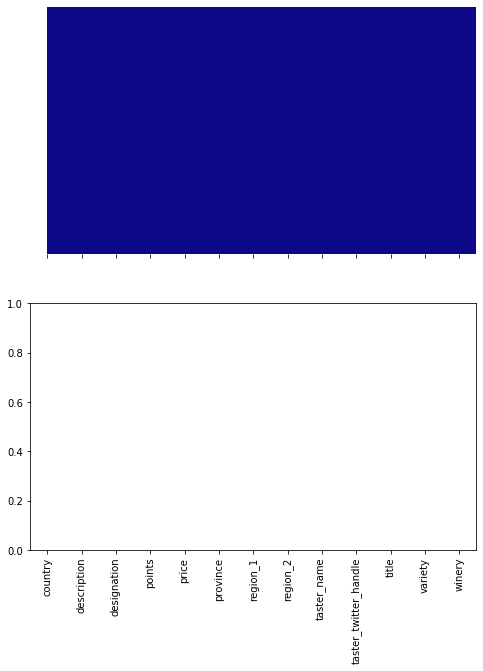

In [7]:
data_4 = data.copy()
data_4 = data_4.dropna(axis=0)
nullplot(data_4)

In [8]:
data_4.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [9]:
data_4.shape

(22387, 13)

### 删除“description”列，因为该列表示评论家对酒的评鉴，不适合用来进行关联规则 挖掘

In [10]:
data_4 = data_4.drop(['description'], axis=1)
data_4.shape

(22387, 12)

In [11]:
data_4.head()

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [12]:
wineTuples = list(zip(*[data_4[c].values.tolist() for c in data_4]))

### 由于数据各特征的属性值较多，当选择较大的支持度时只能够找到极少的关联规则，因此在后续的频繁模式挖掘中，我使用了0.25的支持度以及0.9的置信度

In [14]:
from efficient_apriori import apriori
itemsets, rules = apriori(wineTuples, min_support=0.5, min_confidence=0.9)
print(rules)

[{California} -> {US}]


### 可以看出在此数据集中，绝大部分关联规则主要有关于两个方面
1. 与品鉴师的身份信息相关，例如推特ID、姓名往往是一一映射的，所以二者同时出现的情况较多，也即置信度较高，如{Paul Gregutt} -> {@paulgwine }, {@paulgwine } -> {Paul Gregutt}
2. 品鉴师的身份与酒的产地之间的关系也较为紧密，比如关联规则{@vboone, Virginie Boone} -> {US}说明了该品鉴师往往会对美国产地的酒较为钟爱

In [15]:
itemsets, rules = apriori(wineTuples, min_support=0.25, min_confidence=0.9)
print(rules)

[{Paul Gregutt} -> {@paulgwine }, {@paulgwine } -> {Paul Gregutt}, {@paulgwine } -> {US}, {Paul Gregutt} -> {US}, {@vboone} -> {California}, {@vboone} -> {US}, {Virginie Boone} -> {@vboone}, {@vboone} -> {Virginie Boone}, {California} -> {US}, {Virginie Boone} -> {California}, {Virginie Boone} -> {US}, {Washington} -> {US}, {Paul Gregutt, US} -> {@paulgwine }, {@paulgwine , US} -> {Paul Gregutt}, {@paulgwine , Paul Gregutt} -> {US}, {Paul Gregutt} -> {@paulgwine , US}, {@paulgwine } -> {Paul Gregutt, US}, {@vboone, US} -> {California}, {@vboone, California} -> {US}, {@vboone} -> {California, US}, {California, Virginie Boone} -> {@vboone}, {@vboone, Virginie Boone} -> {California}, {@vboone, California} -> {Virginie Boone}, {Virginie Boone} -> {@vboone, California}, {@vboone} -> {California, Virginie Boone}, {US, Virginie Boone} -> {@vboone}, {@vboone, Virginie Boone} -> {US}, {@vboone, US} -> {Virginie Boone}, {Virginie Boone} -> {@vboone, US}, {@vboone} -> {US, Virginie Boone}, {US, V

### 下面展示了数据集中的频繁项集
可以看出频繁项集的结果与上述关联规则一致，某些品鉴师出现的较为频繁，如Paul Gregutt以及Virginie Boone，其占据了相当一部分的数据样本；此外品鉴师的姓名与推特ID同时出现的较多；某些品鉴师与特定国家同时出现的结果也较多。

In [16]:
print(itemsets)

{1: {('@paulgwine\xa0',): 5989, ('US',): 22387, ('Paul Gregutt',): 5989, ('California',): 12900, ('Virginie Boone',): 6422, ('@vboone',): 6422, ('Washington',): 5845}, 2: {('@paulgwine\xa0', 'Paul Gregutt'): 5989, ('@paulgwine\xa0', 'US'): 5989, ('Paul Gregutt', 'US'): 5989, ('@vboone', 'California'): 6422, ('@vboone', 'US'): 6422, ('@vboone', 'Virginie Boone'): 6422, ('California', 'US'): 12900, ('California', 'Virginie Boone'): 6422, ('US', 'Virginie Boone'): 6422, ('US', 'Washington'): 5845}, 3: {('@paulgwine\xa0', 'Paul Gregutt', 'US'): 5989, ('@vboone', 'California', 'US'): 6422, ('@vboone', 'California', 'Virginie Boone'): 6422, ('@vboone', 'US', 'Virginie Boone'): 6422, ('California', 'US', 'Virginie Boone'): 6422}, 4: {('@vboone', 'California', 'US', 'Virginie Boone'): 6422}}


In [17]:
def lift(pa, pb, pab):
    '''计算提升度'''
    return pab / (pa * pb)

### 品鉴师Virginie Boone与California之间的提升度大于1，说明二者之间是正相关的

In [18]:
lift_of_Boone_and_California = lift(6422/22387, 12900/22387, 6422/22387)
print(lift_of_Boone_and_California)

1.7354263565891472


In [19]:
import math
def consine(pa, pb, pab):
    '''计算余弦度量'''
    return pab / math.sqrt(pa * pb)

### 余弦度量越大，说明二者之间的联系越紧密，这个结果与上述的提升度的结果一致

In [20]:
consine_of_Boone_and_California = consine(6422/22387, 12900/22387, 6422/22387)
print(consine_of_Boone_and_California)

0.7055703064644522


### 通过词云的方式将频繁项集展示出来

In [21]:
with open("txt_save.txt",'w') as file:
    for k, v in itemsets.items():
        for k1, v1 in v.items():
            for i in range(v1):
                file.write(str(k1).strip('(),') + ' ')
#                 list_word[str(k1).strip('(),')] = float(v1)

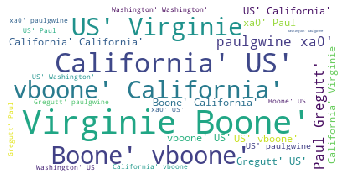

In [22]:
from wordcloud import WordCloud
# from scipy.misc import imread
import matplotlib.pyplot as plt
with open("txt_save.txt","r") as file:
        txt=file.read()
word=WordCloud(background_color="white").generate(txt)

plt.imshow(word)    #使用plt库显示图片
plt.axis("off")
plt.show()

### 仓库地址：[https://github.com/Unintented/data-mining-practice](https://github.com/Unintented/data-mining-practice)